In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Introduction

We will be exploring the data set PGA Tour Top 200 Player Data (2015-2019). This data set tracks the stats of the top 200 PGA Tour data. The capabilities of these players are the top 1% of golfers they are the pinnacle of the sport so the numbers will reflect that. This data will not be a good comparison to look at for any average golfer it is like comparing a local pond to the ocean. In this analysis we will explore what sets apart the top 10 from the top 100 and from the top 200. What can be the deciding factor on where a player falls in these rankings.

In [3]:
data = pd.read_csv('/content/pgafulldata.csv', encoding='ISO-8859-1')

In [42]:
data

,PLAYER NAME,Ball Speed,Driving Distance,Approaches from > 100 yards,Eagles (Holes per),Putts Per Round,Birdie Average,Proximity to Hole,FedexCup Regular Season Points,Average Distance of Putts made,...,Total Birdies,Total Eagles,Spin Rate,Top 10 Finishes,Sand Save Percentage,Scrambling,SG: Total,Smash Factor,Country,College
0,A.J. McInerney (2018),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,USA,"University of Nevada-Las Vegas 2016, Finance"
1,Aaron Wise (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,USA,University of Oregon
2,Aaron Wise (2018),171.85,302.9,"33' 5""",264.0,29.15,4.11,"36' 8""",1086.0,"79' 2""",...,362.0,6.0,2580.3,4.0,47.92,56.28,0.703,1.502,USA,University of Oregon
3,Aaron Wise (2019),174.29,302.6,"33' 10""",414.0,29.25,4.42,"37' 5""",400.0,"72' 1""",...,305.0,3.0,2331.3,1.0,48.19,52.05,0.329,1.495,USA,University of Oregon
4,Abraham Ancer (2016),159.60,276.4,"32' 4""",864.0,29.06,3.33,"34' 9""",147.0,"65' 4""",...,160.0,1.0,2604.7,NaN,46.75,56.67,-0.727,1.493,MEX,"University of Oklahoma 2013, Multi-Disciplinar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,Zecheng Dou (2018),165.76,291.9,"33' 4""",294.0,30.00,3.14,"37' 3""",21.0,"71' 3""",...,154.0,3.0,2772.3,NaN,46.51,51.56,-1.198,1.423,NaN,NaN
1493,Ãngel Cabrera (2015),175.10,299.7,"33' 3""",159.0,29.87,3.47,"37' 0""",208.0,"70' 4""",...,184.0,6.0,2705.1,NaN,42.06,50.45,-0.604,1.495,NaN,NaN
1494,Ãngel Cabrera (2016),171.61,294.6,"34' 11""",372.0,29.66,3.08,"38' 4""",187.0,"69' 10""",...,191.0,3.0,2669.3,NaN,42.86,55.10,-1.164,1.484,NaN,NaN
1495,Ãngel Cabrera (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### Size of the data

In [8]:
data.shape

(1497, 29)

### This dataset has a total of 29 features

### Amount of Null data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAYER NAME                     1497 non-null   object 
 1   Ball Speed                      939 non-null    float64
 2   Driving Distance                939 non-null    float64
 3   Approaches from > 100 yards     939 non-null    object 
 4   Putts Per Round                 939 non-null    float64
 5   Birdie Average                  930 non-null    float64
 6   Proximity to Hole               927 non-null    object 
 7   FedexCup Regular Season Points  1280 non-null   float64
 8   Average Distance of Putts made  937 non-null    object 
 9   GIR Percentage from Fairway     938 non-null    float64
 10  Official Money                  1280 non-null   object 
 11  Bogey Average                   936 non-null    float64
 12  Par 3 Scoring Average           93

* Player name
  - This feature displays a player's name that is on tour as well as the year in which we are observing
* Ball speed
  - Ball speed is a measurement of how fast the golf ball leaves the face of the golf club in miles per hour
* Driving Distance
  - Driving distance displays the yardage that a select player hits their driver on average
* Approaches from less than 100 yards
  - This feature displays the average feet from the hole after a seasons worth of approach shots from less than 100 yards
* Eagles (holes per)
  - We will not be using this feature
* Putts per round
  - Putts per round displays how many putts it took for the player to put the ball in the hole after the accumulation of the round. The lower the better
* Birdie Average
  - Birdie average displays how often on average we can expect a birdie from a given player after the seasons performance
* Proximity to the hole
  - This feature shows on average how close each player starts to the hole before beginning their putting
* FedexCup Regular Season Points
  - The FedexCup is a special tournament where starting position and lead are deterimined by points accumulated throughout the season. This feature measures those points
* Average Distance of Putts made
  - Measures the Average distance we can expect a player to make a putt
* GIR Percentage from Fairway
  - This measures how often players hit a GIR from the fairway. A GIR ( green in regulation) is when a player hits the green within the margin of having 2 putts for par. I.E. Par 4 stroke 1 is your tee shot stroke 2 should hit the green for a GIR and stroke 3,4 should be the putts to make par
* Official Money
  - Official money shows the money a given player has won from the tournaments throughout the season
* Bogey Average
  - bogey average like birdie average measures how often we expect a given player to make bogey. The lower the better
* Par 3 Scoring Average
  - Par 3 scoring average measures how often players make par on par 3s and shows us if the more so lean towards birdies(lower average) or bogeys(higher average)
* Club Head Speed
  - This feature shows us how fast a given player's club head speed is. This has a direct relationship with ball speed.
* Par 4 Scoring Average
  - Par 4 scoring average measures how often players make par on par 4s and shows us if the more so lean towards birdies(lower average) or bogeys(higher average)
* Par 5 Scoring Average
  - Par 5 scoring average measures how often players make par on par 5s and shows us if the more so lean towards birdies(lower average) or bogeys(higher average)
* Driving Accuracy Percentage
  - This feature gives us an accuracy percentage on a given player hitting the fairway with their shots from the tee
* Scoring Average
  - Scoring average shows us what we can expect a given player to score after the round is said and done.
* Total Birdies
  - This measures total birdies throught the season. The higher the better
* Total Eagles
  - This measures total eagles throught the season. The higher the better
* Spin Rate
  - We will not be using this feature
* Top 10 finishes
  - Top 10 finishes shows us how many times a player finished top 10 amoung pros within that given year
* Sand Save percentages
  - Sand save percentages shows us the percentage that you can expect a player to land in a bunker and still make par
* Scrambling
  - scrambling shows us the percentage that you can expect a player to land outside of the fairway or miss the green and still make par
* SG: Total
  - Shots gained total measures how often players were more accurate or gained a stroke on competitors. Positive numbers are better
* Smash factor
  - Smash factor is the comparison from club head speed to ball speed. How good a given player is and using the technology of the club and their own speed to maximize ball speed. The higher the better
* Country
  - We won't be using this feature
* College
  - We won't be using this feature

### Removal of features that won't be used

In [43]:
features_to_remove = ['Eagles (Holes per)', 'Spin Rate', 'Country', 'College']
data = data.drop(columns=features_to_remove)

In [22]:
data.isnull().sum()

PLAYER NAME                         0
Ball Speed                        558
Driving Distance                  558
Approaches from > 100 yards       558
Putts Per Round                   558
Birdie Average                    567
Proximity to Hole                 570
FedexCup Regular Season Points    217
Average Distance of Putts made    560
GIR Percentage from Fairway       559
Official Money                    217
Bogey Average                     561
Par 3 Scoring Average             558
Club Head Speed                   559
Par 4 Scoring Average             557
Par 5 Scoring Average             559
Driving Accuracy Percentage       558
Scoring Average                   561
Total Birdies                     559
Total Eagles                      561
Top 10 Finishes                   563
Sand Save Percentage              558
Scrambling                        560
SG: Total                         561
Smash Factor                      574
dtype: int64

Since this dataset is a measure of professional golfers displaying human capabilities that are refined through training the dataset itself is already really clean


### Here we have a histogram displaying the differences in driving distance amoung players. This displays the range of which Pros are hitting there driver as well as where the majority and big hitters fall.


In [11]:
driving_distances = data['Driving Distance']

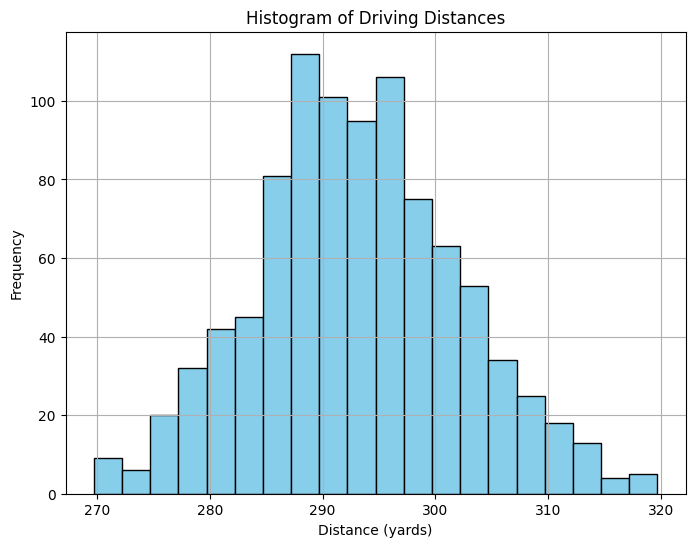

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(driving_distances, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Driving Distances')
plt.xlabel('Distance (yards)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

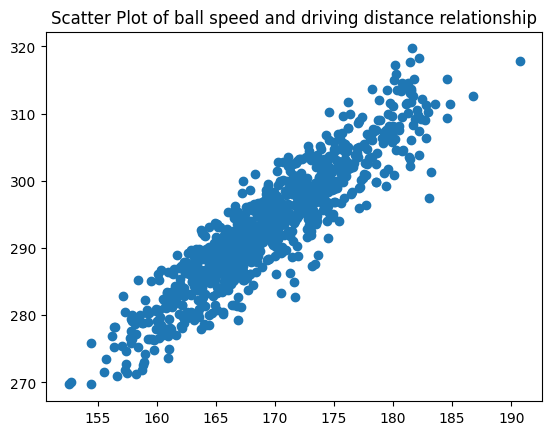

In [4]:
plt.scatter(data['Ball Speed'], y=data['Driving Distance'])
plt.title('Scatter Plot of ball speed and driving distance relationship')
plt.show()

This scatterplot shows the correlation in ball speed and driving distance. On average the faster that ball is traveling when it leaves the players club face the further it is going to travel.

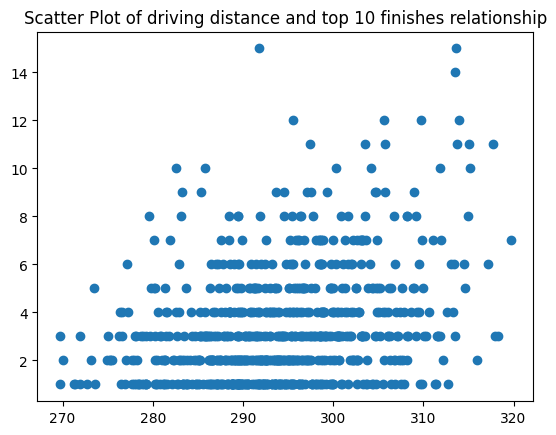

In [5]:
plt.scatter(data['Driving Distance'], y=data['Top 10 Finishes'])
plt.title('Scatter Plot of driving distance and top 10 finishes relationship')
plt.show()

This scatter plot shows the little correlation between driving distance and top 10 finishes. This really drives the point of the saying "putt for dough". These are the top 200 pros, they can be putting great drives out on course. However if they aren't refining other aspects of their game to the same extreme then their finishing numbers don't seem to reap the rewards.

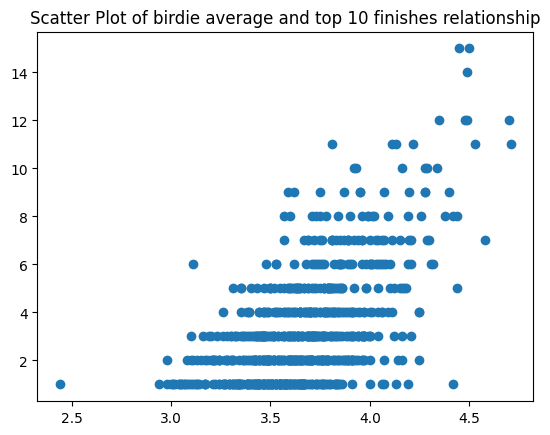

In [23]:
plt.scatter(data['Birdie Average'], y=data['Top 10 Finishes'])
plt.title('Scatter Plot of birdie average and top 10 finishes relationship')
plt.show()

This plot shows that there is a relationship between birdie average and top 10 finishes. This makes sense as birdies lower your score and the lowest scores win.

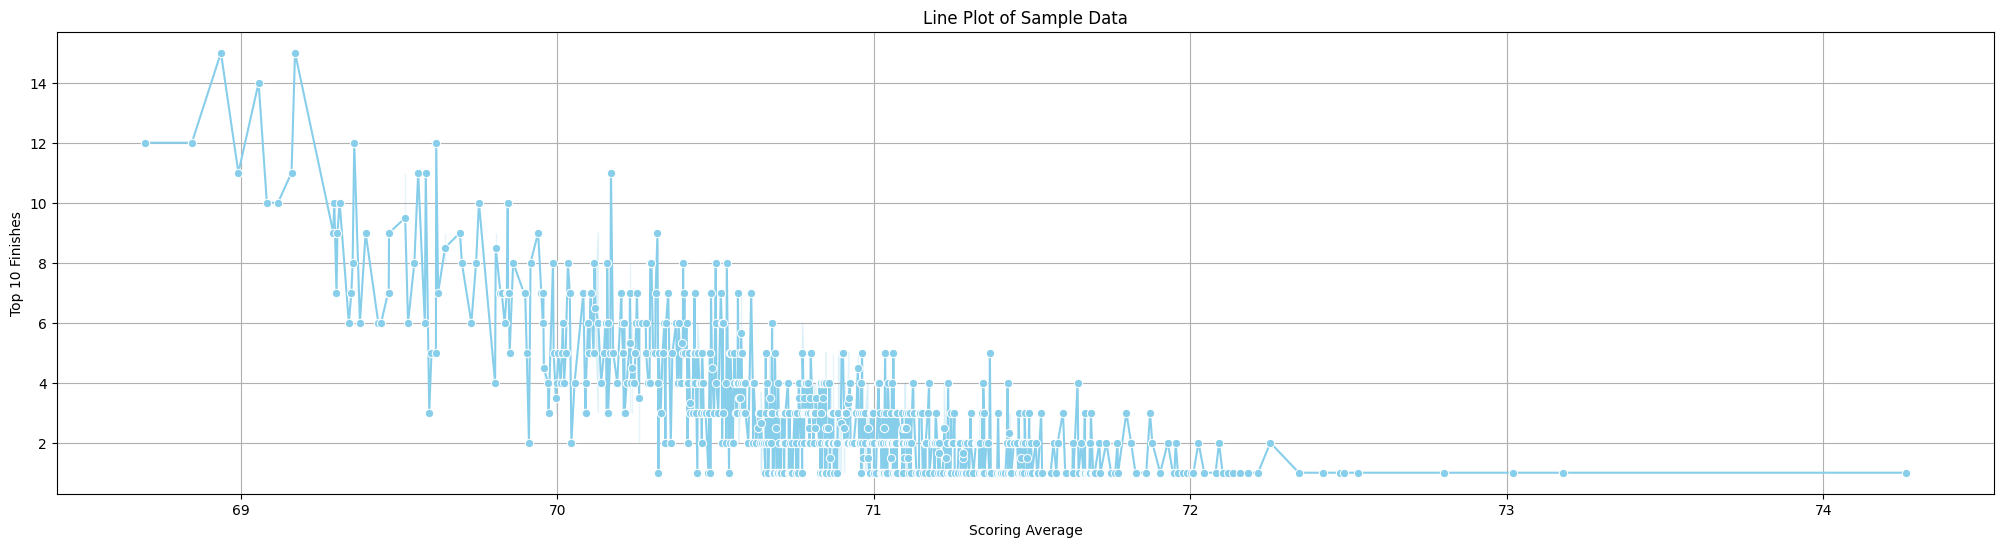

In [18]:
plt.figure(figsize=(25, 6))  # Adjust width and height as needed

# Creating the line plot using Seaborn
sns.lineplot(x=data['Scoring Average'], y=data['Top 10 Finishes'], marker='o', color='skyblue')

# Adding labels and title
plt.xlabel('Scoring Average')
plt.ylabel('Top 10 Finishes')
plt.title('Line Plot of Sample Data')

# Displaying the graph
plt.grid(True)
plt.show()

This line plot shows that the lower the scoring average the higher likelyhood of finishing in the top 10 finishers with a downward trend the higher the score

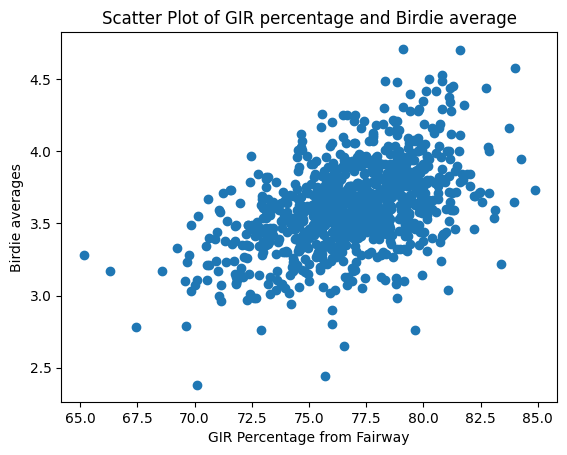

In [20]:
plt.scatter(data['GIR Percentage from Fairway'], y=data['Birdie Average'])
plt.title('Scatter Plot of GIR percentage and Birdie average')
plt.xlabel('GIR Percentage from Fairway')
plt.ylabel('Birdie averages')
plt.show()

This scatter plot shows that the more times the pros hit the fairway they were more likely to hit the green with their approach shot. This would lead to a higher birdie average and with last two plots that would imply that they would then have a better chance and those top 10 positions

### Does Driving distance correlate to better scoring averages

<ipython-input-45-2e31d7542bda>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


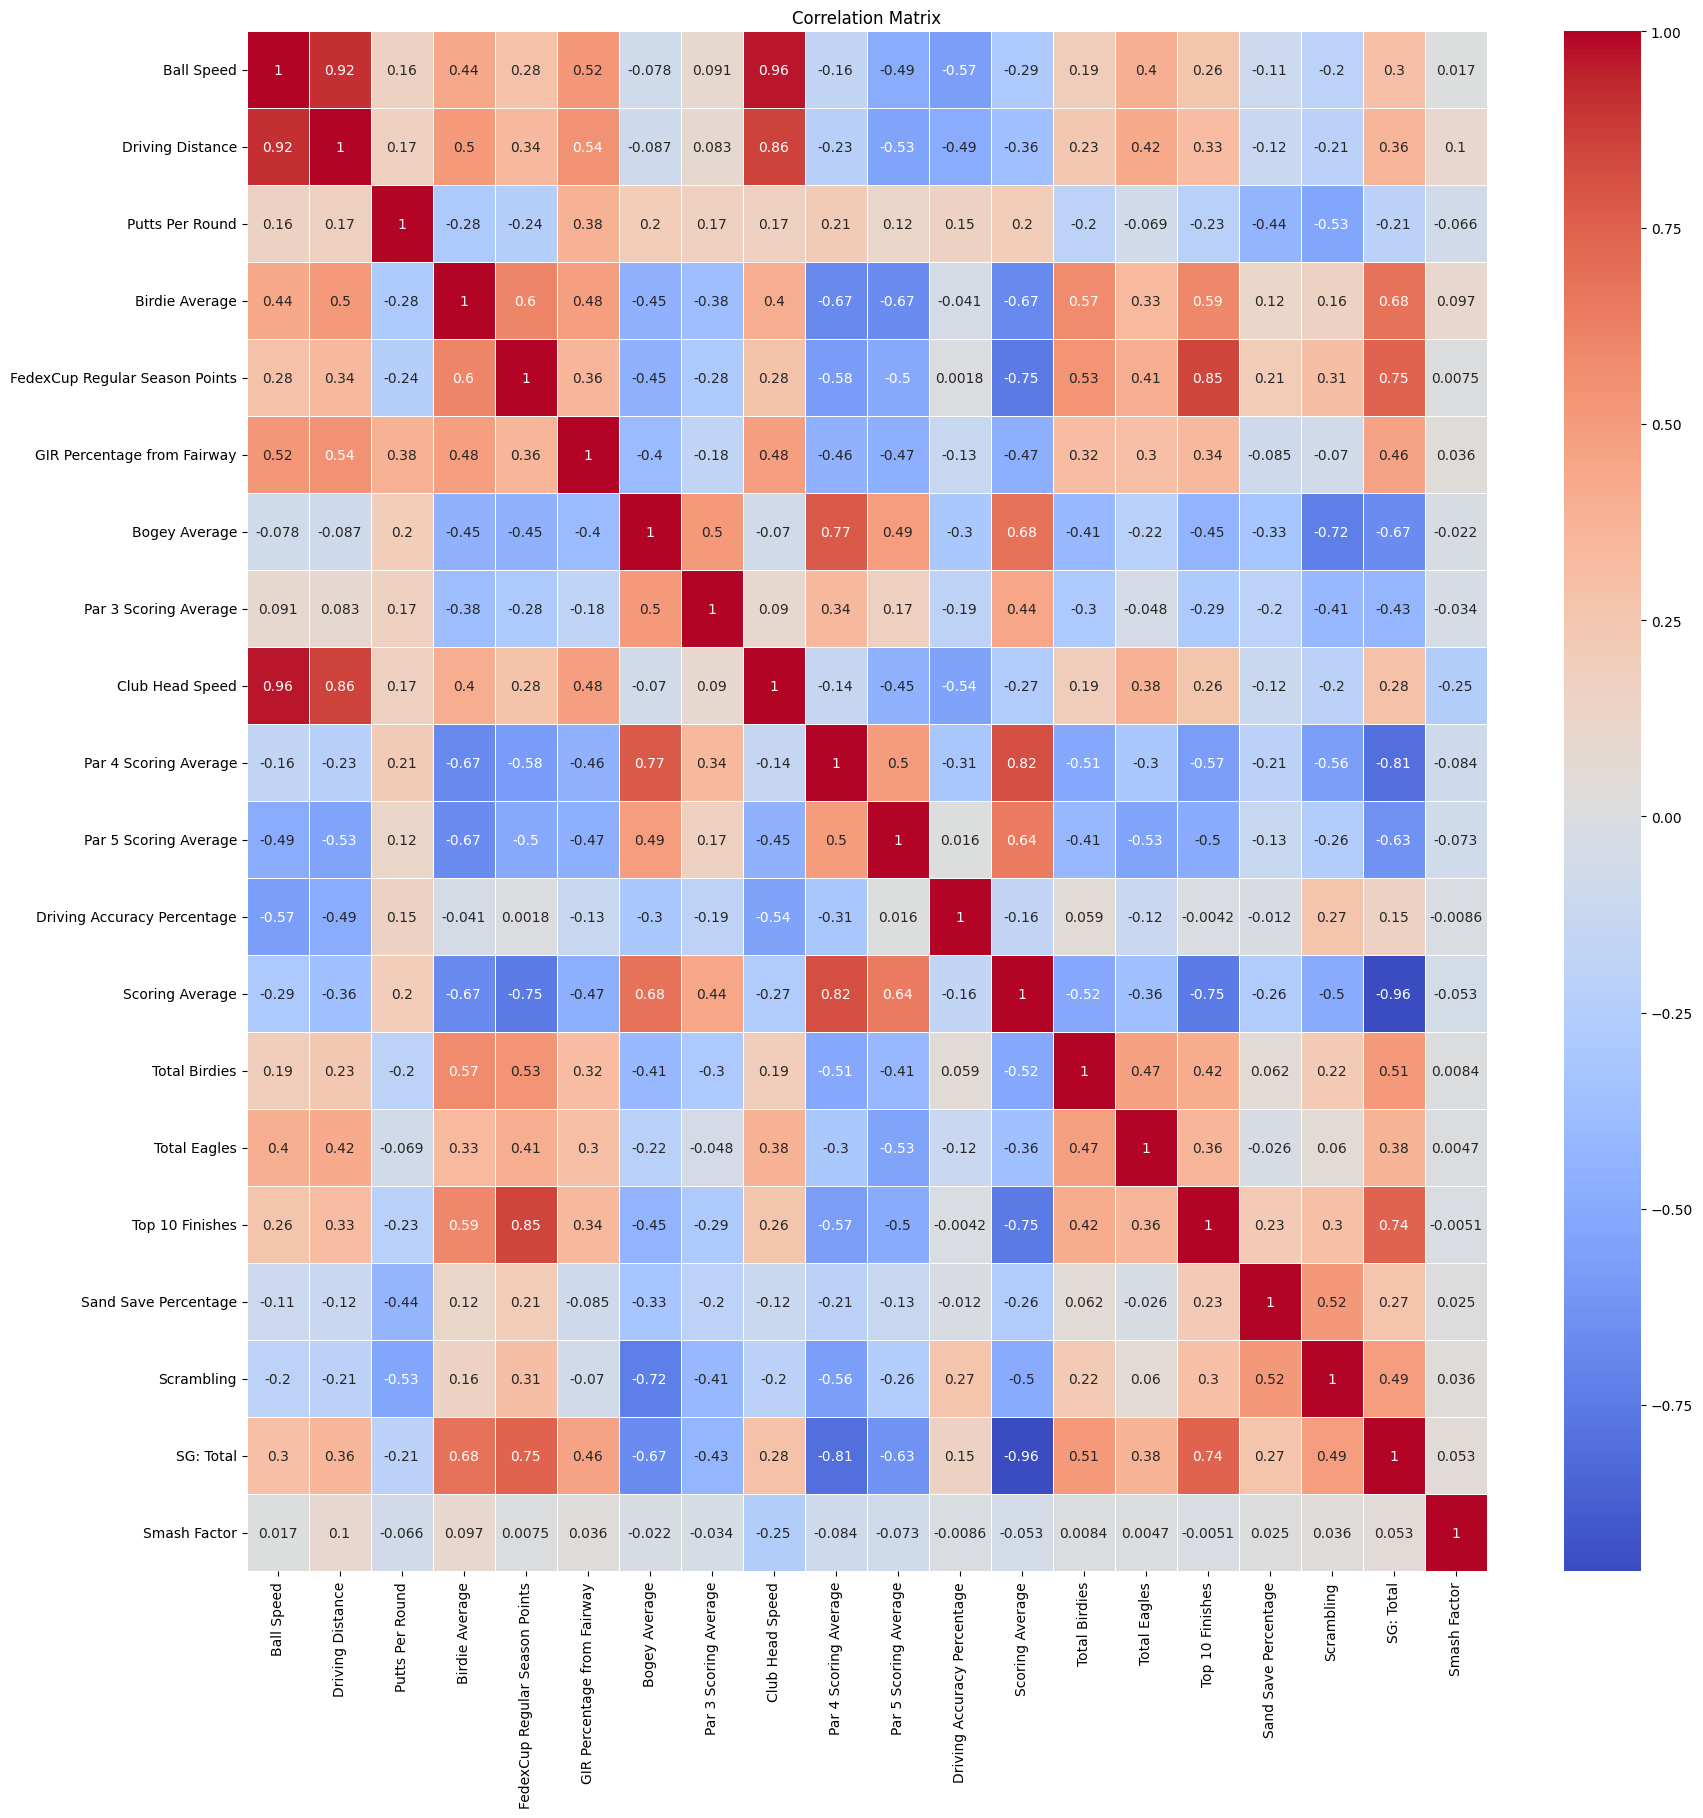

In [45]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## While driving distance doesn't seem to have a massive correlation to Par 4/5 scoring average. It does have a good correlation with Birdie Average

###  Statistical analysis
From the data and the graphs above this is what I believe to be true:
- Better GIR from fairway average
- leads to better birdie average
- leads to better scoring average
- leads to more top 10 finishes and more official money

The graphs above show that the first three points are true. When a Pro starts their aproach in the fairway they tend to have a better chance at birdie. The more birdies a player makes the better their scoring average. As shown on a graph above there is a positive relationship to having a better scoring average and finishing in the top 10. The final question is does finishing in the top 10 lead to more official money. This is fairly simply to account for, of course the top 10 finishers would get more money. The #1 player gets the most and then it trickles down to everyone else

### Summary

In summary we looked at the top 200 PGA tour players. We asked a couple questions regarding how those top players seperated themselves from the pack and lowered their scoring averages. We found that the more often a player hit the fairway their approach shot was more likely to hit the green. That gives them a better proximity to the hole and gives them a better birdie average. The players with better birdie averages tended to have better scoring averages. This is where the pack seperates because those with the best scoring averages tend to have a much better chance at the top 10 finishers.